### Import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

### Check if pytorch is using GPU "GeForce GTX 1060"

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

assert torch.cuda.get_device_name(0) == "GeForce GTX 1060"

### Prepare data

In [3]:
train = datasets.MNIST("../dataset/", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("../dataset/", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

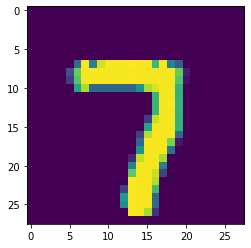

In [4]:
# data is a tensor object containing (is a single batch)
# first tensor holds the images, the second one holds the 
for data in trainset:
    # print(data)
    break
    
# Problem: data[0][0].shape = [1,28,28] ==> Invalid shape for an image
# view is used to reshape the tensor
plt.imshow(data[0][0].view(28,28)) 
plt.show()

### Build NN

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)  # input img 28*28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [6]:
# print the network architecture
net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### Training

In [9]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        x, y = data
        x, y = x.to(device), y.to(device)

        # sets gradients to 0 before loss calc
        net.zero_grad()
        output = net(x.view(-1, 28*28)) 
        loss = F.nll_loss(output, y)  
        loss.backward()  
        optimizer.step() 
    print(loss)

tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward>)


### Evaluation

In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        x, y = data
        x, y = x.to(device), y.to(device)
        output = net(x.view(-1,784))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.973
